# Uber Analysis

## Dataset

The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.) 

Geography: USA, Sri Lanka and Pakistan

Time period: January - December 2016

Unit of analysis: Drives

Total Drives: 1,155

Total Miles: 12,204

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

import warnings
warnings.filterwarnings('ignore')



## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Uber drives.csv", encoding="latin1")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
#removing * from columns
df.columns = df.columns.str.replace("*","")
df.head(1)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 1156 rows and 7 columns in the dataset


In [6]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### handling missing data

In [7]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

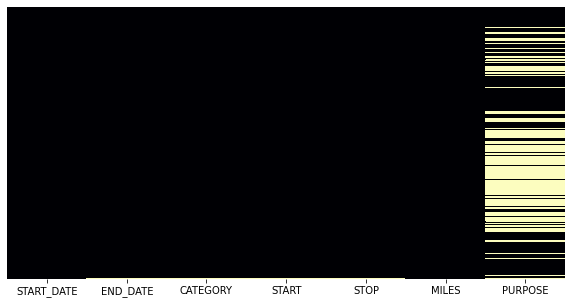

In [8]:
# Visualizing the missing data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap="magma",yticklabels=False,cbar = False)
plt.show()

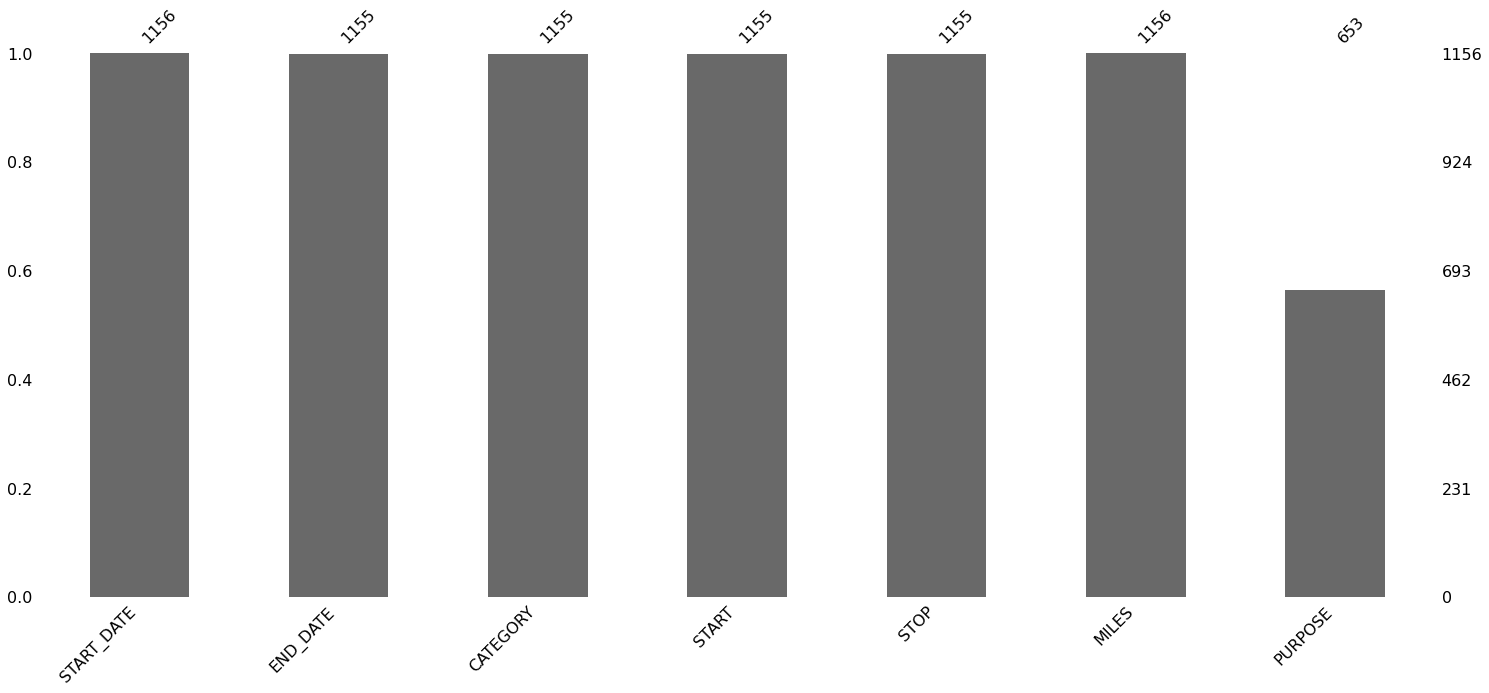

In [9]:
import missingno as msno

msno.bar(df)
plt.show()

In [10]:
df_copy = df.copy()

In [11]:
null_columns = df_copy.columns[df.isnull().any()]
df_copy[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [12]:
df_copy.drop(index = 1155, axis = 0, inplace = True)


In [13]:
df_copy.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [14]:
#percentage of null value present in purpose column
int((df_copy['PURPOSE'].isnull().sum()/len(df_copy))*100)

43

In [15]:
# filling the values in purpose with forward fill
df_copy['PURPOSE'].fillna(method = 'ffill',inplace = True)

In [16]:
df_copy.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

### Relation between duration and purpose of cab ride

In [17]:
df_copy['START_DATE'] = pd.to_datetime(df_copy['START_DATE'], errors='coerce')
df_copy['END_DATE'] = pd.to_datetime(df_copy['END_DATE'], errors='coerce')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


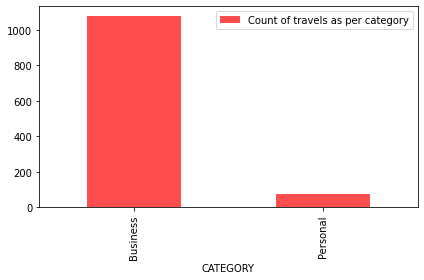

In [18]:
category = pd.crosstab(index = df_copy['CATEGORY'],columns = 'Count of travels as per category')
category.plot(kind = 'bar',color = 'r',alpha = 0.7)
plt.legend()
plt.tight_layout()
category

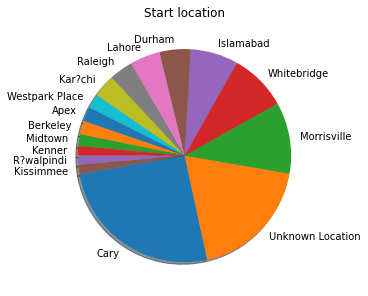

In [19]:
start_point = df_copy.START.value_counts()
start_point_value=start_point[start_point>10]
pie=plt.pie(start_point_value,labels = start_point_value.index, shadow = True, startangle = 190)
plt.tight_layout()
plt.title("Start location")
plt.show()

> According to above pie chart, Start location are more in cary, Morrisville and Whitebridge, While there are some unknown locations which are grouped together.

### Which are the places having lowest start point

In [20]:
start_point = df_copy.START.value_counts()
start_point_value_low=start_point[start_point <= 10]

> Above are start point with lowest number of starts

### Which are the places having highest stop point

In [21]:
Stop_point = df_copy.STOP.value_counts()
Stop_point[Stop_point > 10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

> The places where Cary , Unknown Loccation, Morrisville , Whitebridge and next to Islamabad are highest stop points. Highest stop points are not same as Highest end points , there is a bit difference

### Which are the places are having LOWEST STOP point

In [22]:
Stop_point = df_copy.STOP.value_counts()
Stop_point[Stop_point <= 10]

Kenner            10
New Orleans       10
Edgehill Farms    10
Central            9
Emeryville         9
                  ..
Queens County      1
Chalmette          1
Latta              1
Tudor City         1
Almond             1
Name: STOP, Length: 173, dtype: int64

> these are the lowest stopping point

> Seeing the highest starting and stoping point, we can see that that cary, Morrisville and Whitebridge are famous destination


### Miles most travelled

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64


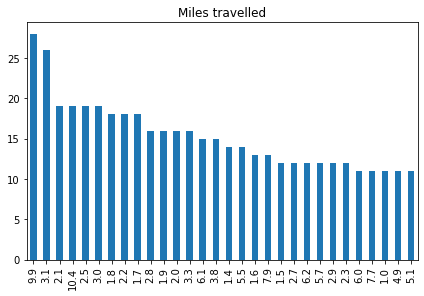

In [23]:
Miles = df_copy.MILES.value_counts()
print(Miles[Miles > 10])

Miles[Miles > 10].plot(kind = 'bar')
plt.tight_layout()
plt.title("Miles travelled")
plt.show()


col_0,Count of Miles
MILES,
False,840
True,315


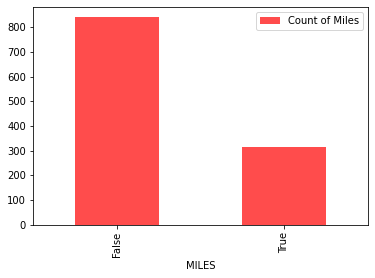

In [24]:
Miles = pd.crosstab(index = df_copy['MILES']>10, columns = 'Count of Miles')
Miles.plot(kind = 'bar', color = 'r',alpha = 0.7)
plt.legend()
Miles

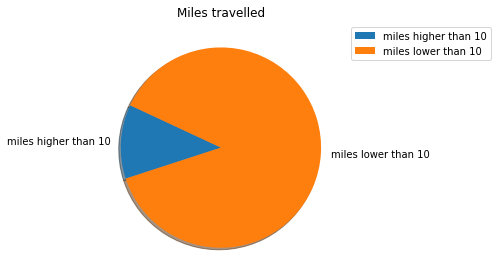

In [25]:
miles  = df_copy.MILES.value_counts()
miles_high = len(miles[miles > 10])
miles_low = len(miles[miles < 10])
pie_values = np.array([miles_high, miles_low])
plt.pie(pie_values,labels=['miles higher than 10','miles lower than 10'], shadow=True, startangle = 155)
plt.title("Miles travelled")
ax = plt.gca()
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
plt.tight_layout()
plt.show()

> From the above plots, we can understand that mostly miles travelled are lower than 10 miles

### Purpose of most cabs

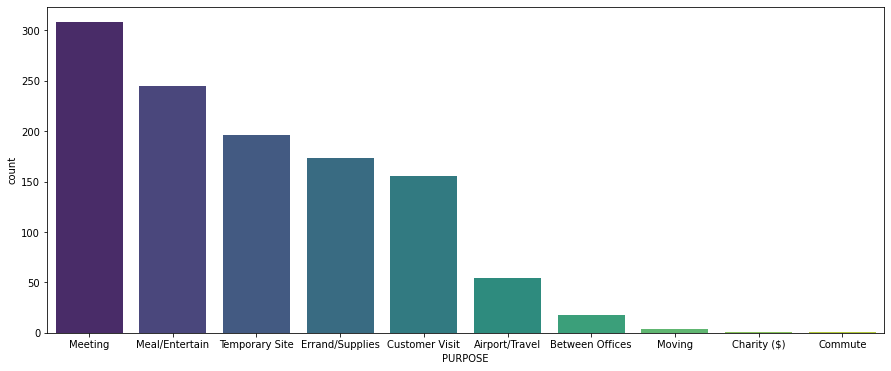

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(df_copy['PURPOSE'],order =df_copy['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

> cabs were mostly used for meetings and entertainment

In [27]:
# calculating minutes of trip
df_copy['MINUTES']=df_copy.END_DATE - df_copy.START_DATE
df_copy['MINUTES'] = df_copy['MINUTES'].dt.total_seconds()/60
df_copy.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


Grouping Purpose by Miles to see if we can get any pattern.

In [28]:
pd.DataFrame({
    'MEAN': df_copy.groupby(['PURPOSE'])['MILES'].mean().round(1),
    'MIN' : df_copy.groupby(['PURPOSE'])['MILES'].min(),
    'MAX' : df_copy.groupby(['PURPOSE'])['MILES'].max()}).reset_index()


,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


### BOX plot of MILES and MINUTES split by PURPOSE 

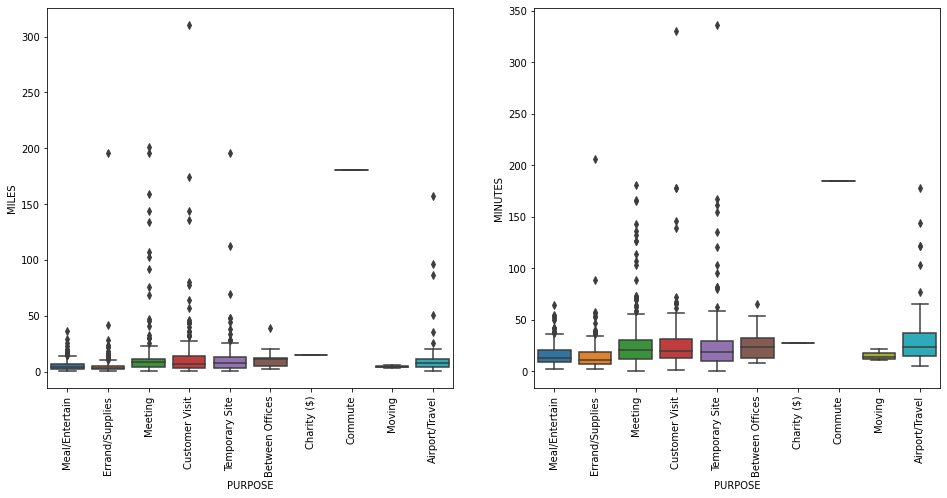

In [29]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data = df_copy,x = df_copy.PURPOSE, y = df_copy.MILES)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(data = df_copy,x = df_copy.PURPOSE, y = df_copy.MINUTES )
plt.xticks(rotation = 90)
plt.show()

Box plot without outliears

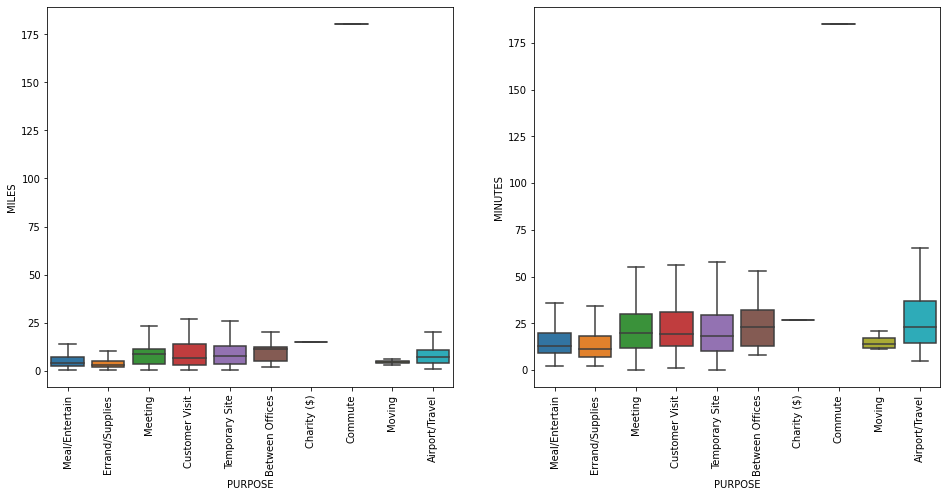

In [30]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data = df_copy, x = df_copy.PURPOSE, y = df_copy.MILES,showfliers = False)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(data = df_copy, x = df_copy.PURPOSE, y = df_copy.MINUTES, showfliers = False)
plt.xticks(rotation=90)
plt.show()


Checking for round about trips

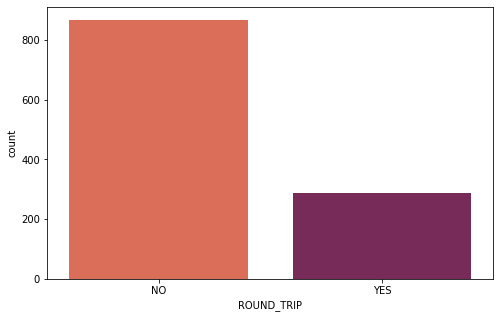

In [31]:
plt.figure(figsize=(8,5))
def round(x):
  if x['START'] == x['STOP']:
    return 'YES'
  else:
    return 'NO'  

df_copy['ROUND_TRIP'] = df_copy.apply(round, axis = 1)
sns.countplot(df_copy['ROUND_TRIP'],order = df_copy['ROUND_TRIP'].value_counts().index, palette = 'rocket_r')
plt.show()

Frequency of trip each month

In [32]:
df_copy['MONTH'] = pd.DatetimeIndex(df_copy['START_DATE']).month

In [33]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df_copy['MONTH'] = df_copy['MONTH'].map(dic)

In [34]:
df_copy

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,YES,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,YES,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,YES,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,YES,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,NO,Jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,YES,Dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,NO,Dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,YES,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,NO,Dec


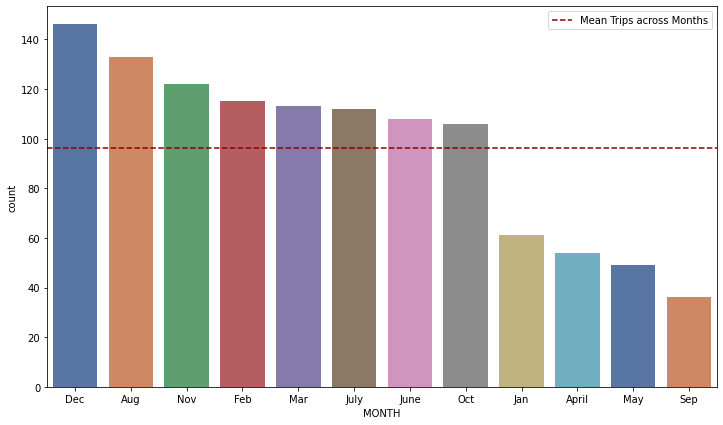

In [35]:
plt.figure(figsize=(12,7))
sns.countplot(df_copy['MONTH'], order = df_copy['MONTH'].value_counts().index, palette="deep")
plt.axhline(df_copy['MONTH'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

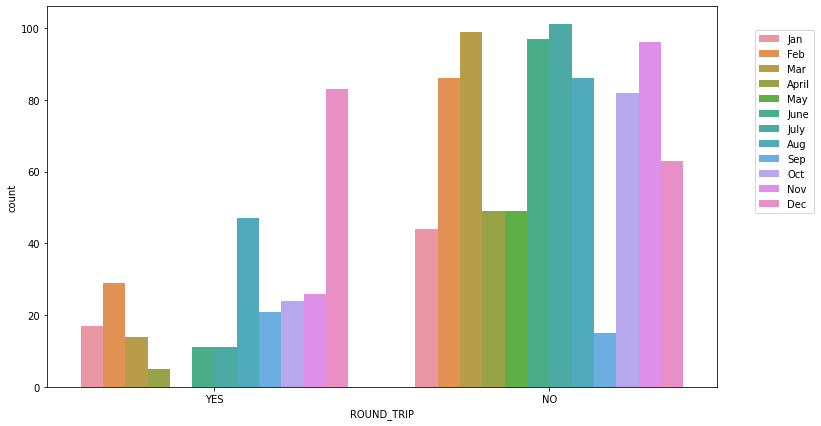

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(df_copy['ROUND_TRIP'],hue = df_copy['MONTH'])
plt.legend(bbox_to_anchor=(1.05, 0.95),loc=2)
plt.show()

### How does the PURPOSE of Cab ride vary with time and distance?

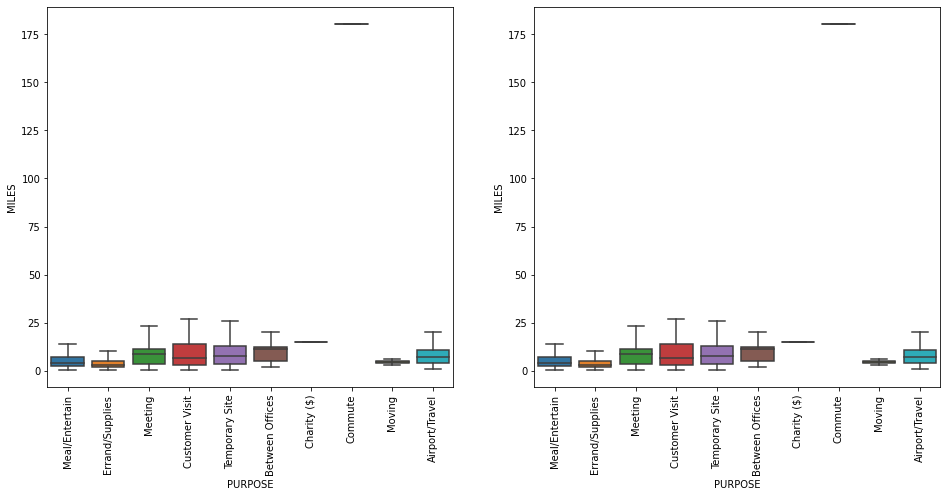

In [37]:
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
sns.boxplot(data = df_copy,x = df_copy.PURPOSE,y = df_copy.MILES, showfliers = False)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(data = df_copy, x = df_copy.PURPOSE, y = df_copy.MILES, showfliers = False)
plt.xticks(rotation = 90)
plt.show()

### Is the distance proportional to the duration?

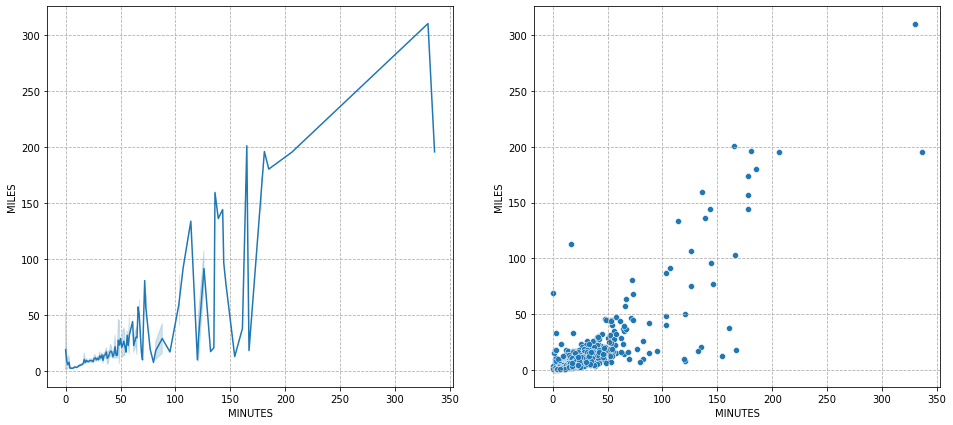

In [39]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data = df_copy, x =df_copy.MINUTES, y = df_copy.MILES)
plt.grid(True, linestyle = '--')

plt.subplot(1,2,2)
sns.scatterplot(data = df_copy,x = df_copy.MINUTES, y = df_copy.MILES)
plt.grid(True, linestyle = '--')
plt.show()

we see that our conventional logic, that distance is proportional to time, is challenged as some cab rides took more time for less distance.

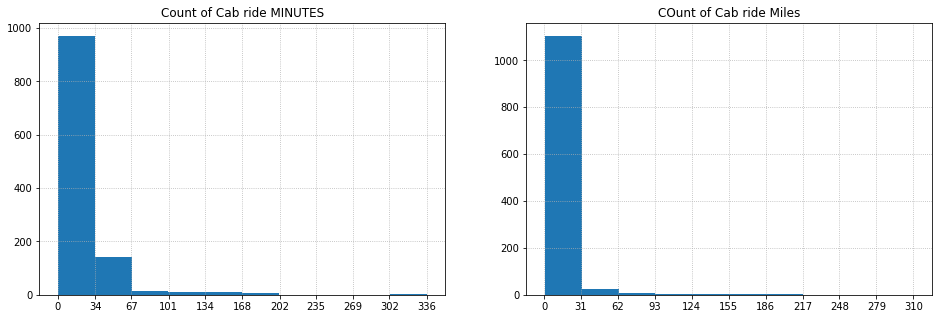

In [44]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
n, bins, patches = plt.hist(df_copy.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle="dotted")
plt.title("Count of Cab ride MINUTES")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df_copy.MILES)
plt.xticks(bins.round())
plt.grid(True, linestyle="dotted")
plt.title("COunt of Cab ride Miles")

plt.show()

### Distribution of Cab rides based on Category

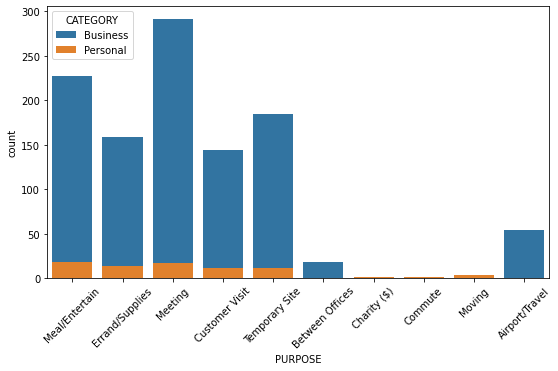

In [45]:
plt.figure(figsize=(9,5))
sns.countplot(data = df_copy,x = "PURPOSE", hue="CATEGORY",dodge=False)
plt.xticks(rotation=45)
plt.show()

The above plot makes clear distinction on the Purpose of Business rides and Personal rides. This may give insight to cab aggregators to decide which sector to introduce new cabs in.

### Where do customers most frequently take cabs?

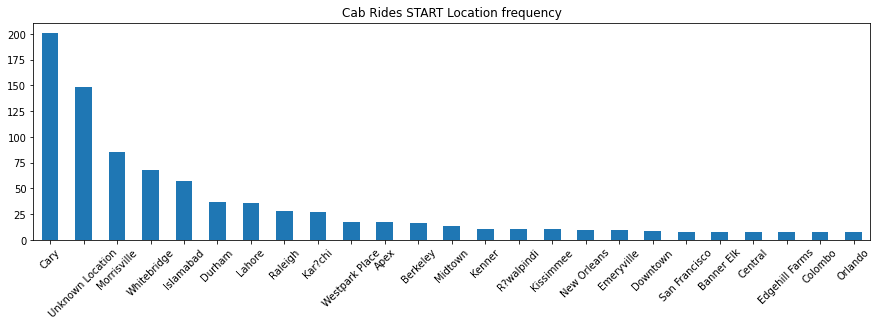

In [46]:
plt.figure(figsize=(15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);

### Frequency of Cab Rides STOP

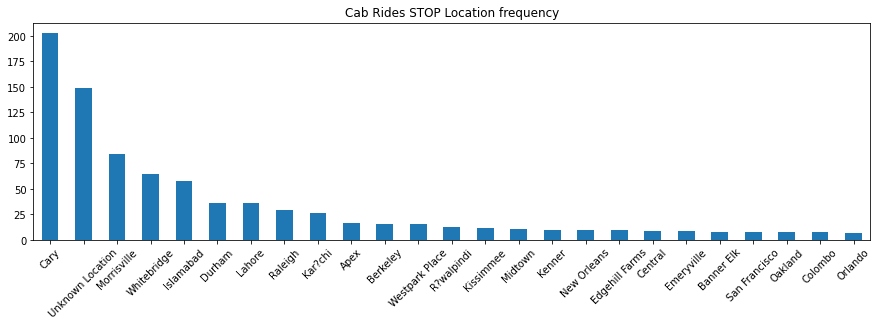

In [47]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 45);

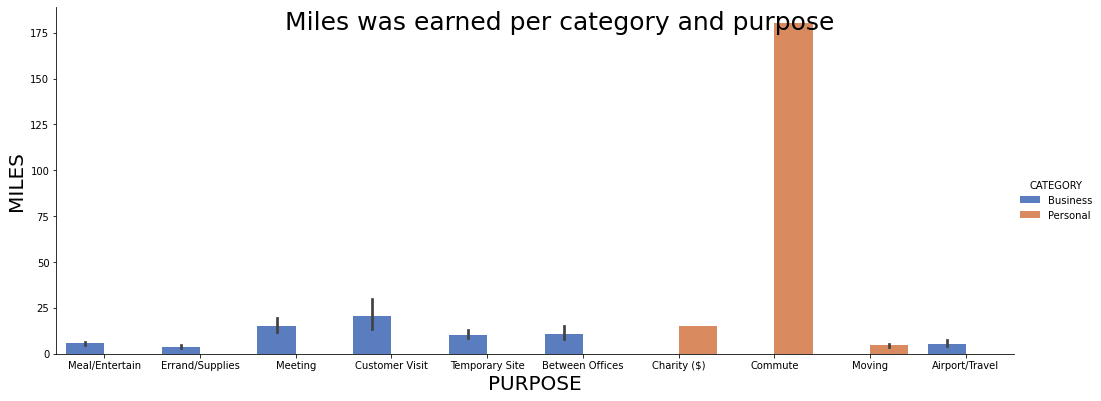

In [49]:
g = sns.factorplot(x="PURPOSE", y="MILES", hue="CATEGORY", data=df,
                   size=15, kind="bar", palette="muted")
g.fig.suptitle('Miles was earned per category and purpose', fontsize= 25)
g.fig.set_size_inches(15, 5)
g.set_xlabels('PURPOSE', fontsize= 20)
g.set_ylabels('MILES', fontsize= 20)
plt.show()

### **CONCLUSION**



1.   Most of the cab rides are within a distance of 31 miles taking about 34 minutes.
2.   Business Cab rides are not only more in volume, but also in distance travelled.
3. Main uses of cab rides are Meal/Entertainment, Customer visit, Meeting, Errand/Supplies.
4. Cab traffic is mostly concentrated in 5 cities or localities.
5. Ac seasonal pattern of cab ride volume exists, which is highest on December.



